<a href="https://colab.research.google.com/github/hannari-python/tutorial/blob/master/library/geodata_exp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install geopandas

     |████████████████████████████████| 972kB 2.7MB/s 
     |████████████████████████████████| 10.9MB 16.6MB/s 
     |████████████████████████████████| 14.7MB 309kB/s 


# geodataの読み込みなどの解説
- 経度や緯度などの情報はgeojsonファイルや、shpファイルに格納されています。
- shpファイルは4つくらいの複数のファイルからなります。shpファイル以外も必須なので注意しましょう。
  - cf https://github.com/hannari-python/tutorial/tree/master/data/osaka_geo
- これらのファイルの読み込みはgeopandasのread_file関数から行えます。
  - https://geopandas.org/
- ここでの解説ではファイルの取得、読み込み、座標系の変換、可視化（folium）、geojsonファイルでの保存を解説します。
- GeopandasはAnacondaを使ってインストールした方が良いようです。あとWindows環境ではそれでもうまく動作しなかったりします。バージョン1になれば解決される？＞分かりません！
- また、Pydeckは今のところGoogle Colabでは動作しません。そのため、本チュートリアルではbinderもしくは、kaggleのノートブックを利用します。

In [4]:
import geopandas as gpd

In [8]:
# メッシュ地図データの取得　https://data.city.osaka.lg.jp/data/dataset/data-00000065/resource/572897cc-46b7-4f3c-9262-3911cfd9a33c
!wget https://data.city.osaka.lg.jp/upload/data-00000065/tikatyousa_2018_500m_souzokurosenka.zip

--2020-08-22 02:50:52--  https://data.city.osaka.lg.jp/upload/data-00000065/tikatyousa_2018_500m_souzokurosenka.zip
Resolving data.city.osaka.lg.jp (data.city.osaka.lg.jp)... 40.74.143.152
Connecting to data.city.osaka.lg.jp (data.city.osaka.lg.jp)|40.74.143.152|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 100997 (99K) [application/zip]
Saving to: ‘tikatyousa_2018_500m_souzokurosenka.zip.1’

tikatyousa_2018_500 100%[===================>]  98.63K  --.-KB/s    in 0.1s    

2020-08-22 02:50:53 (1021 KB/s) - ‘tikatyousa_2018_500m_souzokurosenka.zip.1’ saved [100997/100997]



In [9]:
# zipファイルを開く
!unzip /content/tikatyousa_2018_500m_souzokurosenka.zip

Archive:  /content/tikatyousa_2018_500m_souzokurosenka.zip
replace tikatyousa_2018_500m_souzokurosenka/tikatyousa_2018_500m_souzokurosenka.dbf? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace tikatyousa_2018_500m_souzokurosenka/tikatyousa_2018_500m_souzokurosenka.prj? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace tikatyousa_2018_500m_souzokurosenka/tikatyousa_2018_500m_souzokurosenka.sbn? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace tikatyousa_2018_500m_souzokurosenka/tikatyousa_2018_500m_souzokurosenka.sbx? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace tikatyousa_2018_500m_souzokurosenka/tikatyousa_2018_500m_souzokurosenka.shp? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace tikatyousa_2018_500m_souzokurosenka/tikatyousa_2018_500m_souzokurosenka.shx? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


In [10]:
!pwd

/content


In [12]:
!ls /content/tikatyousa_2018_500m_souzokurosenka

tikatyousa_2018_500m_souzokurosenka.dbf
tikatyousa_2018_500m_souzokurosenka.prj
tikatyousa_2018_500m_souzokurosenka.sbn
tikatyousa_2018_500m_souzokurosenka.sbx
tikatyousa_2018_500m_souzokurosenka.shp
tikatyousa_2018_500m_souzokurosenka.shx


In [13]:
data = gpd.read_file('/content/tikatyousa_2018_500m_souzokurosenka/tikatyousa_2018_500m_souzokurosenka.shp')

In [15]:
data.head()

,MESH_CODE,最高路線価,最低路線価,平均路線価,平均最高路,平均最低路,全平均路線,geometry
0,N095E040,107.0,59.0,83.0,104.0,71.0,88.0,"POLYGON ((-41761.008 -136153.297, -41261.017 -..."
1,N095E045,105.0,59.0,82.0,105.0,59.0,82.0,"POLYGON ((-41261.017 -136153.290, -40761.023 -..."
2,N090E035,108.0,61.0,85.0,103.0,66.0,84.0,"POLYGON ((-42261.011 -136653.294, -41761.023 -..."
3,N090E040,121.0,46.0,84.0,112.0,74.0,93.0,"POLYGON ((-41761.023 -136653.292, -41261.031 -..."
4,N090E045,120.0,46.0,83.0,97.0,68.0,83.0,"POLYGON ((-41261.031 -136653.286, -40761.035 -..."


## データ解説
- geometryのところに位置データが入っている
- Polygonというのは複数の経度緯度により囲まれた位置データ
- Shapelyというライブラリのオブジェクトが使われている
  - https://shapely.readthedocs.io/en/latest/
- Pythonで位置データを扱う場合Shapelyがよく使われているように思われます。

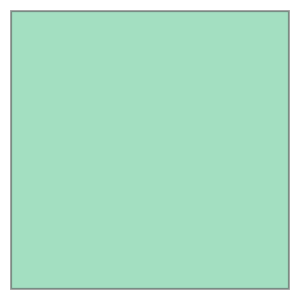

In [17]:
# 500メートル四方で囲まれた位置データなので、このようにきれいな正方形になっています。
data.loc[1, 'geometry']


In [19]:
# 形でなく、データを見たい場合、strで見れます
str(data.loc[1, 'geometry'])

'POLYGON ((-41261.01685561291 -136153.2895493884, -40761.02325572473 -136153.2763149813, -40761.03456268809 -136653.273354389, -41261.03096738275 -136653.2855757028, -41261.01685561291 -136153.2895493884))'

In [35]:
import folium 

data_fc = data.loc[1, 'geometry'].centroid # 指定の場所の中央のデータを取得
m = folium.Map([data_fc.y, data_fc.x], zoom_start=5)
folium.GeoJson(data.loc[1, 'geometry']).add_to(m)
m

## これってよく見る経度緯度ではないので地図が出ない！！！
- そうです。その通りです。違うのです

In [21]:
# crs属性で確認できる
data.crs

<Projected CRS: EPSG:2448>
Name: JGD2000 / Japan Plane Rectangular CS VI
Axis Info [cartesian]:
- X[north]: Northing (metre)
- Y[east]: Easting (metre)
Area of Use:
- name: Japan - zone VI
- bounds: (134.86, 33.4, 136.99, 36.33)
Coordinate Operation:
- name: Japan Plane Rectangular CS zone VI
- method: Transverse Mercator
Datum: Japanese Geodetic Datum 2000
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

# 我々が良く知るやつはEPSG:4326ってやつです
- 座標系は to_crsメソッド変更できるのでやってみます。
- pyprojというやつがいろいろこの辺をやってくれるようです
   - https://pyproj4.github.io/pyproj/stable/

In [24]:
data.to_crs('epsg:4326')

,MESH_CODE,最高路線価,最低路線価,平均路線価,平均最高路,平均最低路,全平均路線,geometry
0,N095E040,107.0,59.0,83.0,104.0,71.0,88.0,"POLYGON ((135.54376 34.77184, 135.54922 34.771..."
1,N095E045,105.0,59.0,82.0,105.0,59.0,82.0,"POLYGON ((135.54922 34.77186, 135.55468 34.771..."
2,N090E035,108.0,61.0,85.0,103.0,66.0,84.0,"POLYGON ((135.53832 34.76731, 135.54378 34.767..."
3,N090E040,121.0,46.0,84.0,112.0,74.0,93.0,"POLYGON ((135.54378 34.76733, 135.54924 34.767..."
4,N090E045,120.0,46.0,83.0,97.0,68.0,83.0,"POLYGON ((135.54924 34.76735, 135.55470 34.767..."
...,...,...,...,...,...,...,...,...
1931,S120E070,0.0,0.0,0.0,0.0,0.0,0.0,"POLYGON ((135.57749 34.58264, 135.58294 34.582..."
1932,S120E075,0.0,0.0,0.0,0.0,0.0,0.0,"POLYGON ((135.58294 34.58266, 135.58839 34.582..."
1933,S120E080,0.0,0.0,0.0,0.0,0.0,0.0,"POLYGON ((135.58839 34.58268, 135.59384 34.582..."
1934,S120E085,0.0,0.0,0.0,0.0,0.0,0.0,"POLYGON ((135.59384 34.58270, 135.59929 34.582..."


In [25]:
import folium

In [31]:
data_changed = data.to_crs('epsg:4326')
data_changed_fc = data_changed.loc[1, 'geometry'].centroid
m = folium.Map([data_changed_fc.y, data_changed_fc.x], zoom_start=15)
folium.GeoJson(data_changed.loc[1, 'geometry']).add_to(m)
m

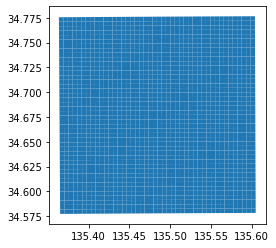

In [41]:
# データをそのままmatplotlibで可視化することも

data_changed.plot()

## ファイルをgeojsonで保存します
- 4つもファイル抱えるの嫌・・・

In [44]:
osaka_json = data_changed.to_json()
with open('osaka_geo.json', 'w') as j:
  j.write(osaka_json)

In [45]:
gpd.read_file('/content/osaka_geo.json')

,id,MESH_CODE,全平均路線,平均最低路,平均最高路,平均路線価,最低路線価,最高路線価,geometry
0,0,N095E040,88.0,71.0,104.0,83.0,59.0,107.0,"POLYGON ((135.54376 34.77184, 135.54922 34.771..."
1,1,N095E045,82.0,59.0,105.0,82.0,59.0,105.0,"POLYGON ((135.54922 34.77186, 135.55468 34.771..."
2,2,N090E035,84.0,66.0,103.0,85.0,61.0,108.0,"POLYGON ((135.53832 34.76731, 135.54378 34.767..."
3,3,N090E040,93.0,74.0,112.0,84.0,46.0,121.0,"POLYGON ((135.54378 34.76733, 135.54924 34.767..."
4,4,N090E045,83.0,68.0,97.0,83.0,46.0,120.0,"POLYGON ((135.54924 34.76735, 135.55470 34.767..."
...,...,...,...,...,...,...,...,...,...
1931,1931,S120E070,0.0,0.0,0.0,0.0,0.0,0.0,"POLYGON ((135.57749 34.58264, 135.58294 34.582..."
1932,1932,S120E075,0.0,0.0,0.0,0.0,0.0,0.0,"POLYGON ((135.58294 34.58266, 135.58839 34.582..."
1933,1933,S120E080,0.0,0.0,0.0,0.0,0.0,0.0,"POLYGON ((135.58839 34.58268, 135.59384 34.582..."
1934,1934,S120E085,0.0,0.0,0.0,0.0,0.0,0.0,"POLYGON ((135.59384 34.58270, 135.59929 34.582..."
